In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

plt.style.use('ggplot')

# 요약 통계 분석

## 1. 데이터 개요
- **총 데이터 행 수**: 36 (연도별 및 성별 데이터)
- **총 열 수**: 11 (타겟 변수 포함)
- **결측값**: 없음 (모든 데이터가 완전함)

## 2. 변수별 분석 결과

### 1. **birth_rate (출산율)**
- **평균값**: 0.8737, **중앙값**: 0.9650.
- 출산율이 1.0 이상인 데이터는 일부 연도에 국한, 0.55 이하의 낮은 값도 관찰됨.

### 2. **경제적 요인**
- **employment_rate**: 
  - 평균 60.51%, 최대 71.7%.
  - 성별 차이에 따른 분포 확인 필요.
- **monthly_wage**: 
  - 평균 2631.25, 최대 4260.0.
  - 성별 월급 차이를 고려한 추가 분석 필요.
- **housing_price_index** 및 **rental_price_index**: 
  - 각각 평균 85.34, 81.59로 안정적인 분포를 보임.

### 3. **사회적 요인**
- **first_marriage_age**: 
  - 평균 초혼 연령은 31.75세로, 남성과 여성 간 차이 확인 필요.
- **urbanized_rate**: 
  - 평균 60.61로 큰 변동이 없으나, 시계열적 변화에 따른 트렌드 분석 가능.

## 3. 이상치
- **IQR(사분위 범위) 기준**:
  - 대부분의 변수에서 이상치가 거의 없음.

In [7]:
path = './cleaned/final_data.csv'
df = pd.read_csv(path)

In [6]:
# Basic Information about the Dataset
print("Dataset Info:")
print(df.info())

# Descriptive Statistics for All Columns
print("\nDescriptive Statistics:")
display(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   36 non-null     int64  
 1   birth_count            36 non-null     float64
 2   birth_rate             36 non-null     float64
 3   gender                 36 non-null     object 
 4   employment_population  36 non-null     float64
 5   employment_rate        36 non-null     float64
 6   monthly_wage           36 non-null     float64
 7   first_marriage_age     36 non-null     float64
 8   housing_price_index    36 non-null     float64
 9   rental_price_index     36 non-null     float64
 10  urbanized_rate         36 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 3.2+ KB
None

Descriptive Statistics:


,year,birth_count,birth_rate,employment_population,employment_rate,monthly_wage,first_marriage_age,housing_price_index,rental_price_index,urbanized_rate
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,2014.500000,74260.833333,0.873722,21306.916667,60.508333,2631.250000,31.754722,85.345000,81.589444,60.608333
std,5.261722,20840.970751,0.173511,1153.842128,10.686637,788.479962,1.498055,10.040182,15.050214,0.828322
min,2006.000000,39456.000000,0.552000,18825.500000,47.800000,1413.000000,28.760000,61.360000,54.070000,59.170000
25%,2010.000000,53673.000000,0.717000,20458.750000,50.000000,1939.250000,30.770000,80.800000,67.370000,59.890000
50%,2014.500000,83358.000000,0.965000,21486.950000,61.950000,2626.500000,31.815000,83.855000,85.895000,60.900000
75%,2019.000000,93266.000000,1.010000,22221.875000,71.125000,3230.750000,32.845000,93.250000,93.860000,61.390000
max,2023.000000,101249.000000,1.068000,23045.200000,71.700000,4260.000000,34.380000,102.730000,101.550000,61.390000


# 시각적 탐색 

- birth_rate(출산율)를 기준으로 경제적, 사회적 요인 변수들을 스케일링하여, 연도별 추세 변화와 출산율의 상관관계를 시각적으로 확인.
- birth_rate와 각 경제적 요인 변수를 정규화하여 스케일 차이를 제거.
- 변수 간 연도별 추세 변화를 동일 기준에서 비교.

In [14]:
# 여성 데이터 분리
female_data = df[df['gender'] == 'F']

# 남성 데이터 분리
male_data = df[df['gender'] == 'M']

# 출산률 데이터 시각화

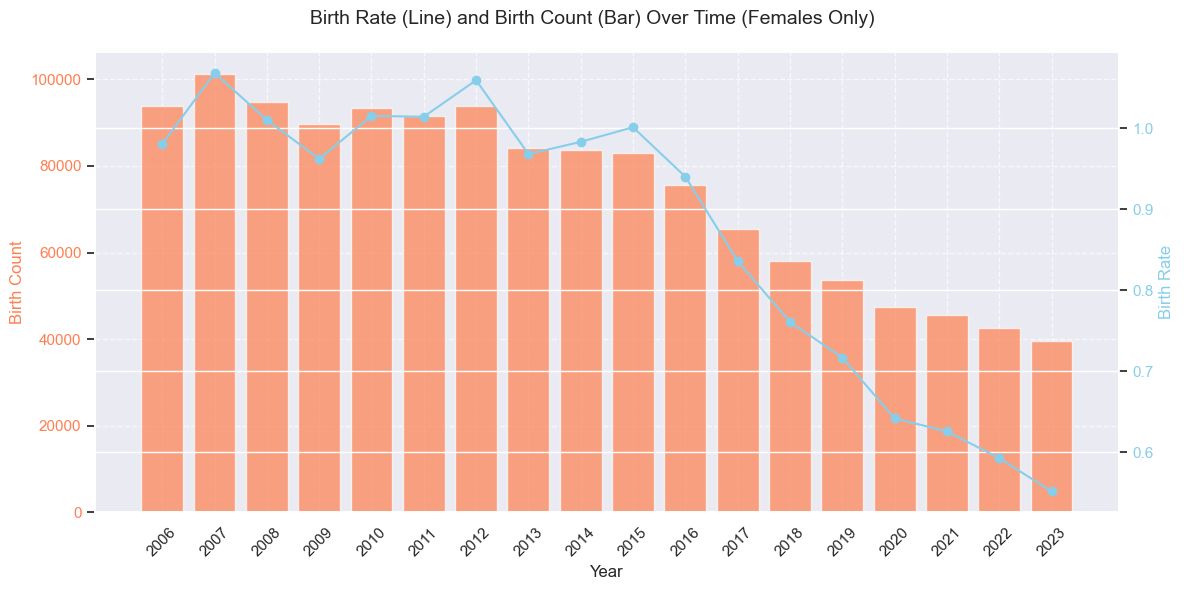

In [20]:
# Set up the visual style
sns.set(style="darkgrid")

# Time Series: Birth Rate (Line) and Birth Count (Bar)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Birth Count as a bar graph on primary Y-axis
ax1.bar(female_data['year'], female_data['birth_count'], color='coral', alpha=0.7, label='Birth Count')
ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Birth Count", color='coral', fontsize=12)
ax1.tick_params(axis='y', labelcolor='coral')
ax1.grid(visible=True, linestyle="--", alpha=0.7)

# Plot Birth Rate as a line graph on secondary Y-axis
ax2 = ax1.twinx()
ax2.plot(female_data['year'], female_data['birth_rate'], marker='o', color='skyblue', label='Birth Rate')
ax2.set_ylabel("Birth Rate", color='skyblue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='skyblue')

# Set X-axis ticks to show integer years only
ax1.set_xticks(female_data['year'])
ax1.set_xticklabels(female_data['year'].astype(int), rotation=45)

# Add title and legend
fig.suptitle("Birth Rate (Line) and Birth Count (Bar) Over Time (Females Only)", fontsize=14)
fig.tight_layout()
plt.show()

# 경제적 요인 데이터 시각화

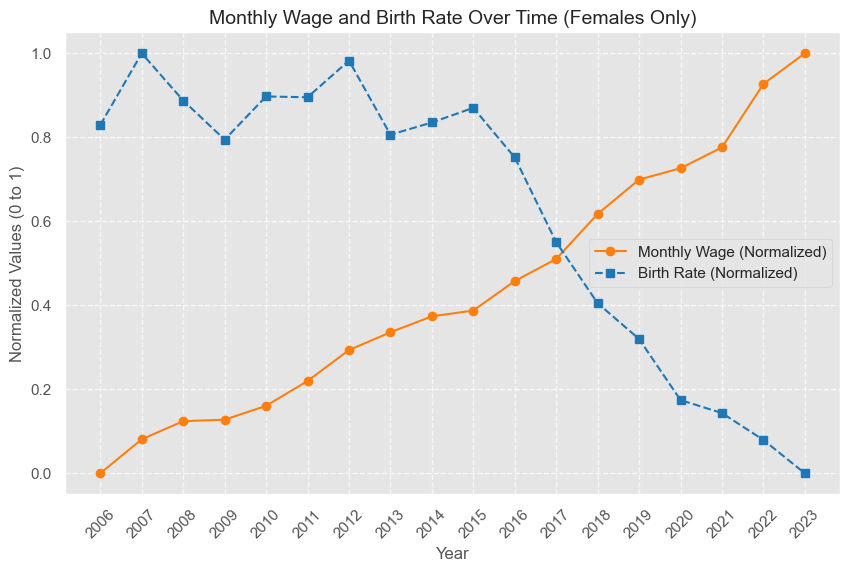

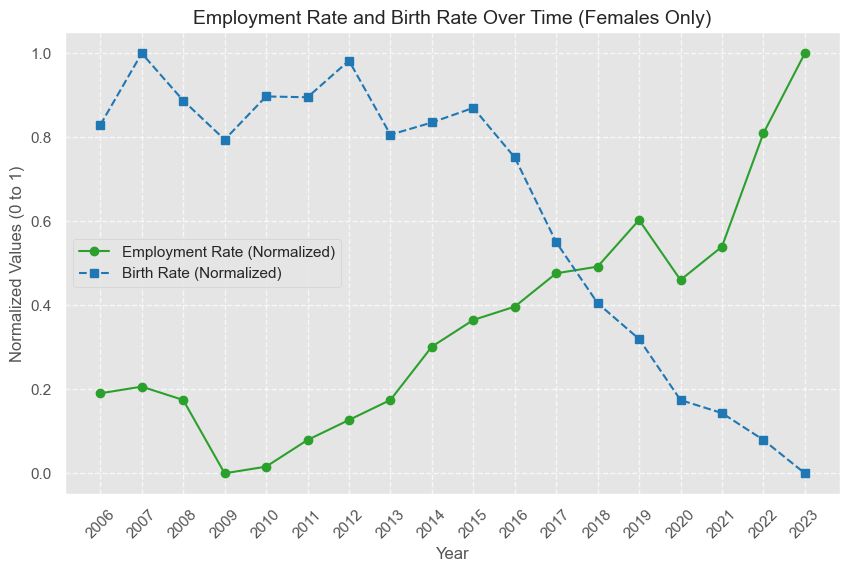

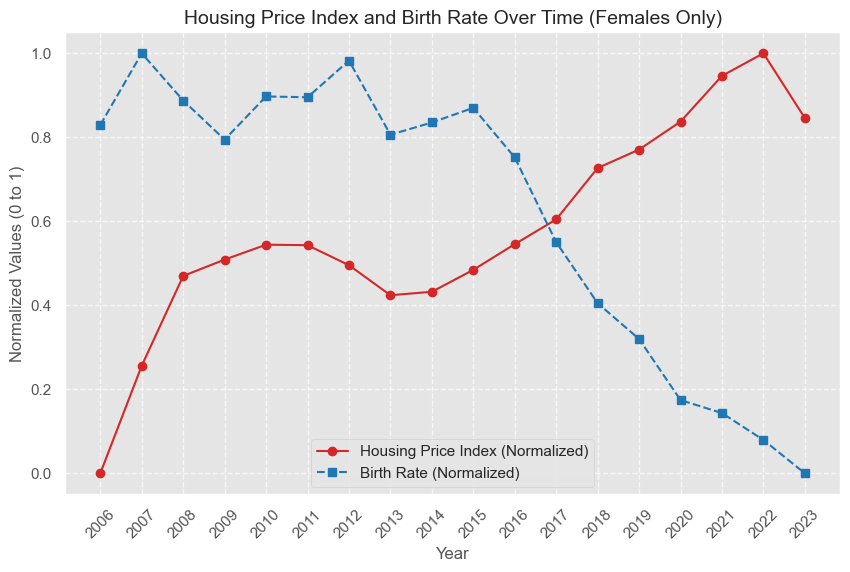

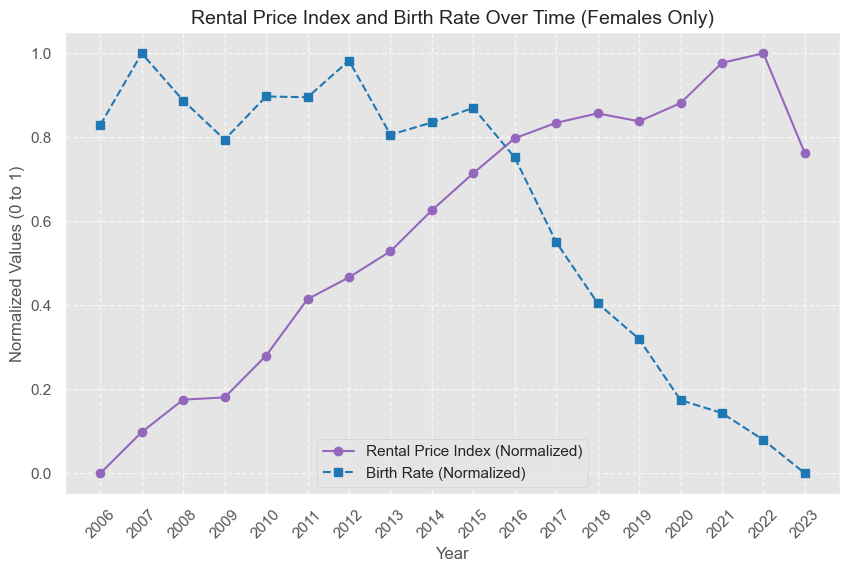

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the final dataset
df = pd.read_csv('./cleaned/final_data.csv')

# Filter for female data
female_data = df[df['gender'] == 'F']

# Ensure the data is sorted by 'year'
female_data = female_data.sort_values(by='year')

# Normalize the data (Min-Max Scaling)
scaler = MinMaxScaler()
normalized_cols = ['birth_rate', 'monthly_wage', 'employment_rate', 'housing_price_index', 'rental_price_index']
female_data[[col + '_normalized' for col in normalized_cols]] = scaler.fit_transform(female_data[normalized_cols])

# Use ggplot style
plt.style.use('ggplot')

# Function to plot economic factors
def plot_economic_factors(data, x_col, y_col, label_y, color, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data[x_col], data[y_col], marker='o', color=color, label=label_y)
    plt.plot(data[x_col], data['birth_rate_normalized'], marker='s', linestyle='--', color='#1f77b4', label='Birth Rate (Normalized)')
    plt.title(title, fontsize=14)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Normalized Values (0 to 1)", fontsize=12)
    plt.xticks(data[x_col], rotation=45)
    plt.legend()
    plt.grid(visible=True, linestyle="--", alpha=0.7)
    plt.show()

# 1. Monthly Wage vs Birth Rate
plot_economic_factors(
    female_data,
    x_col='year',
    y_col='monthly_wage_normalized',
    label_y='Monthly Wage (Normalized)',
    color='#ff7f0e',  # ggplot orange
    title='Monthly Wage and Birth Rate Over Time (Females Only)'
)

# 2. Employment Rate vs Birth Rate
plot_economic_factors(
    female_data,
    x_col='year',
    y_col='employment_rate_normalized',
    label_y='Employment Rate (Normalized)',
    color='#2ca02c',  # ggplot green
    title='Employment Rate and Birth Rate Over Time (Females Only)'
)

# 3. Housing Price Index vs Birth Rate
plot_economic_factors(
    female_data,
    x_col='year',
    y_col='housing_price_index_normalized',
    label_y='Housing Price Index (Normalized)',
    color='#d62728',  # ggplot red
    title='Housing Price Index and Birth Rate Over Time (Females Only)'
)

# 4. Rental Price Index vs Birth Rate
plot_economic_factors(
    female_data,
    x_col='year',
    y_col='rental_price_index_normalized',
    label_y='Rental Price Index (Normalized)',
    color='#9467bd',  # ggplot purple
    title='Rental Price Index and Birth Rate Over Time (Females Only)'
)

# 사회적 요인 데이터 시각화

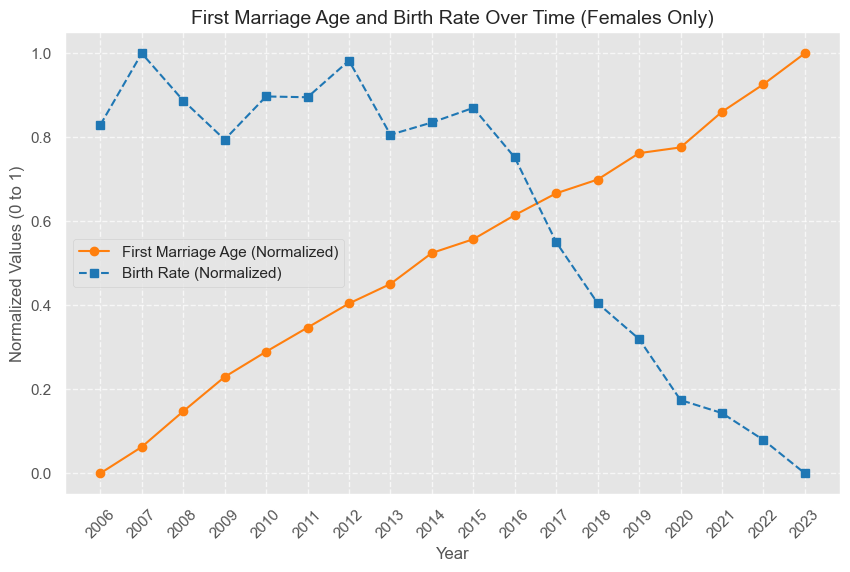

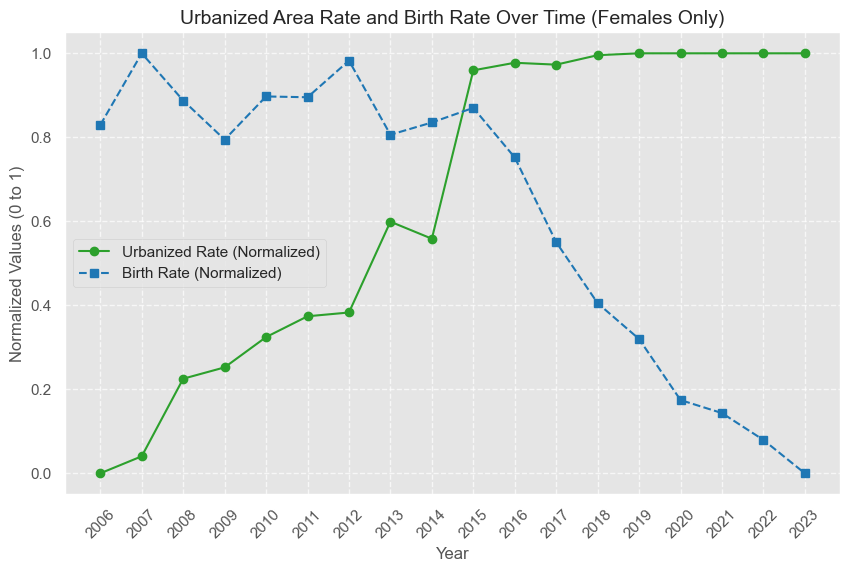

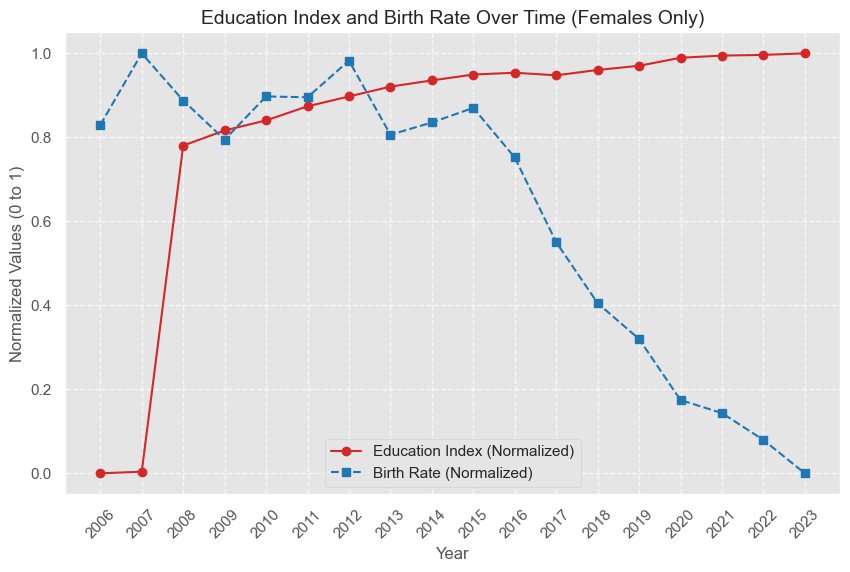

    year  edu_index  edu_index_normalized
1   2006   2.886418              0.000000
2   2007   2.890208              0.003852
4   2008   3.654046              0.780336
6   2009   3.689363              0.816238
8   2010   3.712978              0.840243
10  2011   3.745989              0.873801
13  2012   3.769124              0.897319
14  2013   3.792102              0.920677
16  2014   3.806657              0.935473
18  2015   3.820409              0.949453
20  2016   3.824635              0.953749
22  2017   3.818596              0.947610
25  2018   3.831116              0.960338
26  2019   3.840924              0.970307
28  2020   3.859692              0.989386
30  2021   3.864780              0.994559
32  2022   3.866396              0.996202
35  2023   3.870133              1.000000


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the final dataset with edu_index
df = pd.read_csv('./cleaned/final_data.csv')

# Filter for female data
female_data = df[df['gender'] == 'F']

# Ensure the data is sorted by 'year'
female_data = female_data.sort_values(by='year')

# Normalize the data (Min-Max Scaling)
scaler = MinMaxScaler()
normalized_cols = ['birth_rate', 'first_marriage_age', 'urbanized_rate', 'edu_index']
female_data[[col + '_normalized' for col in normalized_cols]] = scaler.fit_transform(female_data[normalized_cols])

# Use ggplot style
plt.style.use('ggplot')

# Function to plot social factors
def plot_social_factors(data, x_col, y_col, label_y, color, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data[x_col], data[y_col], marker='o', color=color, label=label_y)
    plt.plot(data[x_col], data['birth_rate_normalized'], marker='s', linestyle='--', color='#1f77b4', label='Birth Rate (Normalized)')
    plt.title(title, fontsize=14)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Normalized Values (0 to 1)", fontsize=12)
    plt.xticks(data[x_col], rotation=45)
    plt.legend()
    plt.grid(visible=True, linestyle="--", alpha=0.7)
    plt.show()

# 1. First Marriage Age vs Birth Rate
plot_social_factors(
    female_data,
    x_col='year',
    y_col='first_marriage_age_normalized',
    label_y='First Marriage Age (Normalized)',
    color='#ff7f0e',  # ggplot orange
    title='First Marriage Age and Birth Rate Over Time (Females Only)'
)

# 2. Urbanized Rate vs Birth Rate
plot_social_factors(
    female_data,
    x_col='year',
    y_col='urbanized_rate_normalized',
    label_y='Urbanized Rate (Normalized)',
    color='#2ca02c',  # ggplot green
    title='Urbanized Area Rate and Birth Rate Over Time (Females Only)'
)

# 3. Education Index vs Birth Rate
plot_social_factors(
    female_data,
    x_col='year',
    y_col='edu_index_normalized',
    label_y='Education Index (Normalized)',
    color='#d62728',  # ggplot red
    title='Education Index and Birth Rate Over Time (Females Only)'
)

print(female_data[['year', 'edu_index', 'edu_index_normalized']])

# 상관분석

# 출산율과 경제적 및 사회적 요인의 상관분석 결과

## 1. Economic Factors (경제적 요인)

| 변수                   | 상관계수 | 해석                                                         |
|------------------------|----------|-------------------------------------------------------------|
| **employment_rate**    | -0.061   | 고용률과 출산율 간 매우 약한 음의 상관관계. 유의미하지 않을 가능성.   |
| **monthly_wage**       | -0.544   | 월평균 임금이 높을수록 출산율이 감소하는 경향. 중간 정도의 음의 상관관계. |
| **housing_price_index**| -0.839   | 주택 매매지수가 높을수록 출산율이 크게 감소. 강한 음의 상관관계.      |
| **rental_price_index** | -0.755   | 전세 가격이 높을수록 출산율이 감소. 강한 음의 상관관계.            |

### 해석
- **주거 비용 상승**(주택 매매지수, 전세 가격)이 출산율 감소와 강하게 연관.
- 고용률은 출산율과 연관성이 거의 없으며, **임금 수준**은 중간 정도의 음의 상관관계를 보임.
- **주거 비용**은 결혼과 출산에 주요한 제약 요인으로 작용.

---

## 2. Social Factors (사회적 요인)

| 변수                  | 상관계수 | 해석                                                         |
|-----------------------|----------|-------------------------------------------------------------|
| **first_marriage_age**| -0.578   | 초혼 연령이 높을수록 출산율이 감소. 중간 정도의 음의 상관관계.        |
| **urbanized_rate**    | -0.753   | 시가화율이 높을수록 출산율이 감소. 강한 음의 상관관계.             |
| **edu_index**         | -0.415   | 초혼 학력 지수가 높을수록 출산율이 감소. 약한 음의 상관관계.         |

### 해석
- **초혼 연령**과 **시가화율**은 출산율 감소와 중요한 연관을 가짐.
- **시가화율**의 강한 음의 상관관계는 도시화가 출산율에 부정적 영향을 미칠 가능성을 나타냄.
- **초혼 학력 지수**는 출산율 감소와 약한 음의 상관관계를 보이며, 학력 상승이 출산을 미루거나 포기하는 경향과 관련될 수 있음.

---

## 종합 해석

### 1. 경제적 요인
- **주거 비용 상승**(매매지수, 전세지수)이 출산율에 강한 음의 영향을 미침.
- **임금 수준**도 출산율 감소에 영향을 주는 중요한 요인.
- **고용률**은 출산율과 연관성이 낮음.

### 2. 사회적 요인
- **초혼 연령**과 **시가화율**이 출산율 감소와 강하게 연관.
- **초혼 학력 지수**는 약한 음의 상관관계를 보이며, 출산율에 상대적으로 덜 영향을 미침.

---

## 주요 메시지
- **주거 비용**:
  - 주택 매매 및 전세 지수 상승은 결혼 및 출산 결정에 주요 제약 요인.
- **도시화**:
  - 시가화율 상승은 출산율 감소와 밀접한 관계가 있으며, 도시 거주와 출산 사이의 불균형을 나타냄.
- **초혼 연령**:
  - 초혼 연령 상승은 출산율 감소에 영향을 미치는 중간 정도의 요인.

---

## 정책적 시사점
- **주거 비용**: 주택 매매 및 전세 비용을 낮추는 정책 마련.
- **도시화**: 도시화에 따른 출산 지원 정책 강화.
- **초혼 연령**: 초혼 연령 상승에 대한 심리적, 사회적 지원 방안 도입.

In [37]:
import pandas as pd

# 데이터 로드
df = pd.read_csv('./cleaned/final_data.csv')

# 상관분석: 경제적 요인과 출산율
economic_factors = ['employment_rate', 'monthly_wage', 'housing_price_index', 'rental_price_index']
economic_correlation = df[['birth_rate'] + economic_factors].corr(method='pearson')['birth_rate'].drop('birth_rate')

# 상관분석: 사회적 요인과 출산율
social_factors = ['first_marriage_age', 'urbanized_rate', 'edu_index']
social_correlation = df[['birth_rate'] + social_factors].corr(method='pearson')['birth_rate'].drop('birth_rate')

# 결과 출력
print("Economic Factors Correlation with Birth Rate:")
print(economic_correlation)

print("\nSocial Factors Correlation with Birth Rate:")
print(social_correlation)

Economic Factors Correlation with Birth Rate:
employment_rate       -0.061076
monthly_wage          -0.544286
housing_price_index   -0.838863
rental_price_index    -0.754758
Name: birth_rate, dtype: float64

Social Factors Correlation with Birth Rate:
first_marriage_age   -0.577741
urbanized_rate       -0.752958
edu_index            -0.414730
Name: birth_rate, dtype: float64


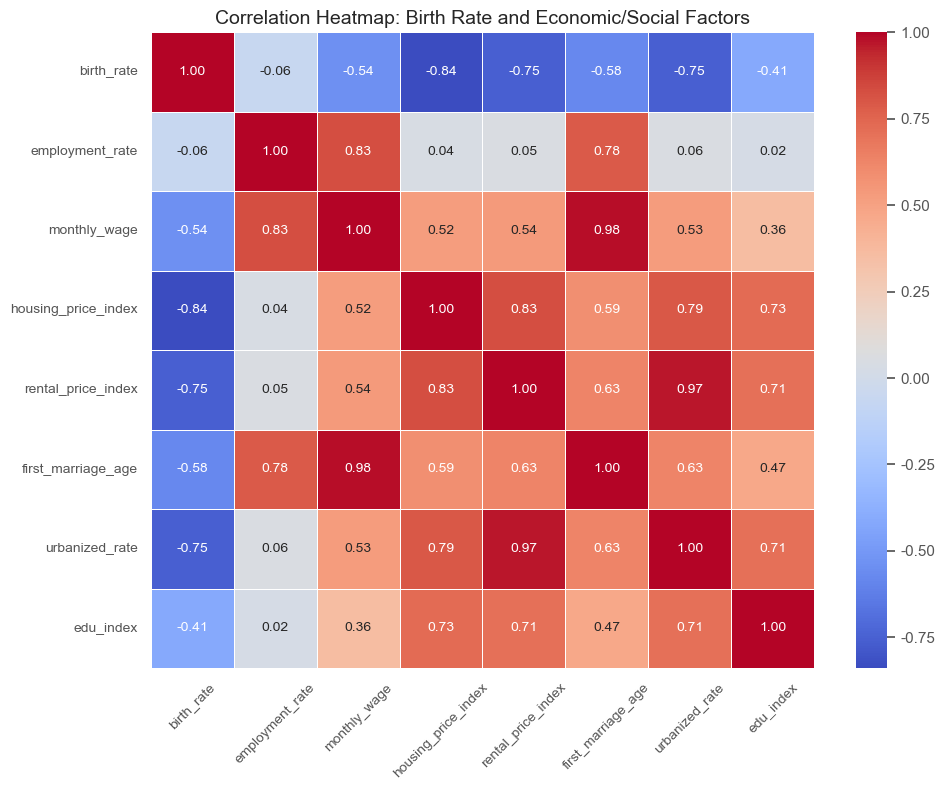

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the final dataset
df = pd.read_csv('./cleaned/final_data.csv')

# 경제적 요인과 사회적 요인을 함께 포함한 변수 리스트
factors = ['birth_rate', 'employment_rate', 'monthly_wage', 
           'housing_price_index', 'rental_price_index', 
           'first_marriage_age', 'urbanized_rate', 'edu_index']

# 상관계수 계산
correlation_matrix = df[factors].corr(method='pearson')

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Birth Rate and Economic/Social Factors', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# 다중 공선성 확인

In [41]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 데이터 로드
df = pd.read_csv('./cleaned/final_data.csv')

# 독립 변수 선택 (예: 경제적, 사회적 요인만)
independent_vars = df[['employment_rate', 'monthly_wage', 'housing_price_index', 
                       'rental_price_index', 'first_marriage_age', 
                       'urbanized_rate', 'edu_index']]

# 상수항 추가
X = add_constant(independent_vars)

# VIF 계산
vif_data = pd.DataFrame({
    "Variable": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# VIF 결과 출력
print(vif_data)

              Variable           VIF
0                const  99813.905301
1      employment_rate     35.057051
2         monthly_wage     49.860383
3  housing_price_index      7.200134
4   rental_price_index     23.278769
5   first_marriage_age    113.094157
6       urbanized_rate     21.458610
7            edu_index      3.054697
